In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [22]:
# Завантаження даних
data = fetch_california_housing()
X, y = data.data, data.target

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# 1. Базова лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Прогнозування та оцінка
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse}, R^2 = {train_r2}")
print(f"Тестові дані: MSE = {test_mse}, R^2 = {test_r2}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 0.5179331255246699, R^2 = 0.6125511913966952
Тестові дані: MSE = 0.5558915986952442, R^2 = 0.575787706032451


In [30]:
# 2. Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_ridge_pred = ridge_model.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f"Ridge Regression. MSE: {ridge_mse}, R^2: {ridge_r2}")

Ridge Regression. MSE: 0.5558548589435974, R^2: 0.575815742891368


In [31]:
# 3. Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_lasso_pred = lasso_model.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f"Lasso Regression. MSE: {lasso_mse}, R^2: {lasso_r2}")

Lasso Regression. MSE: 0.6796290284328821, R^2: 0.4813611325029077


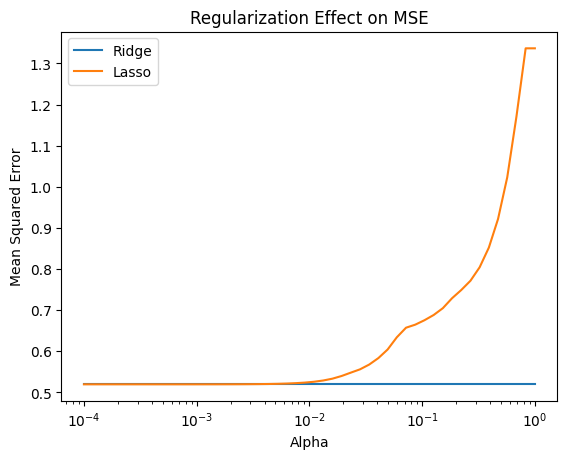

In [26]:
# Графік залежності помилки від альфа
alphas = np.logspace(-4, 0, 50)
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    ridge_scores.append(np.mean(cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')))
    lasso_scores.append(np.mean(cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')))

plt.plot(alphas, -np.array(ridge_scores), label='Ridge')
plt.plot(alphas, -np.array(lasso_scores), label='Lasso')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Regularization Effect on MSE')
plt.legend()
plt.show()

**Висновок:** Для виконання 1 завдання було побудувано кілька регресійних моделей, зокрема лінійну, Ridge і Lasso регресії, і оцінка їхньої продуктивності. Лінійна регресія на тестовій вибірці показала MSE 0.5559 і R^2 0.5758, що свідчить про відносно непогану точність, хоча й далеку від ідеалу. Регуляція в моделі Ridge дала майже такий самий результат, але не суттєво покращила продуктивність. Модель Lasso виявилася менш ефективною, маючи вищий MSE 0.6796 і нижчий R^2 0.4814, що свідчить про те, що в цьому випадку регуляція Lasso не тільки не допомогла покращити продуктивність, а навпаки — призвела до зниження якості моделі.

**Завдання 2**

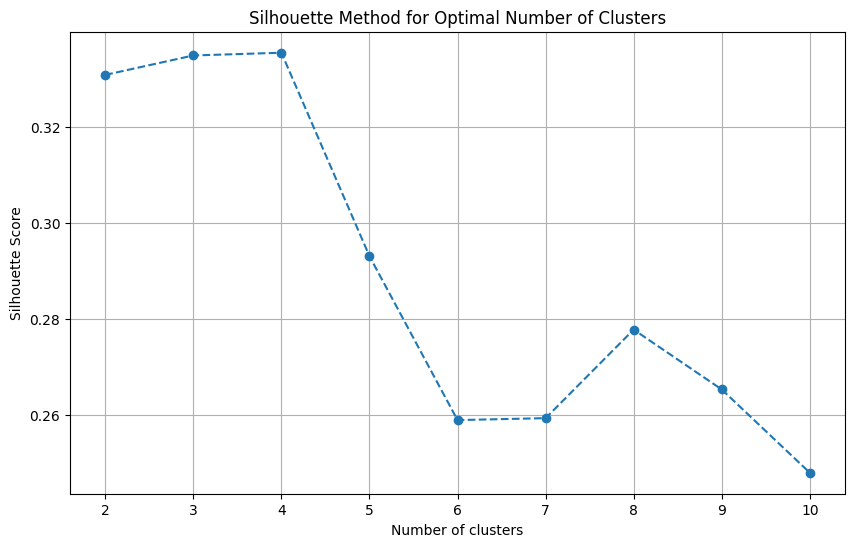

In [27]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Тут використовується X із fetch_california_housing

# Застосування методу силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Обчислення середнього коефіцієнта силуетів
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

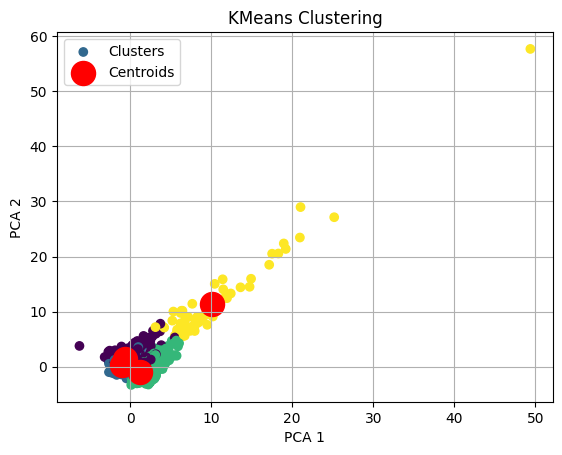

In [28]:
# Оптимальна кількість кластерів - 4

# Застосування PCA для зменшення розмірності для візуалізації
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train_scaled)

# Кластеризація методом KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Візуалізація кластерів
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


**Висновок:**Після успішного виконання кластеризації даних із датасету fetch_california_housing я масштабував ознаки, потім застосував метод силуетів для визначення оптимальної кількості кластерів (4). Далі використав алгоритм KMeans для розбиття даних на 4 кластери та візуалізував результати на графіку разом із центроїдами кластерів, що дозволило оцінити розподіл даних між кластерами.